In [289]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [290]:
df_2 = pd.read_csv(r'C:\Users\ZEYNEP\Desktop\nba players data.csv')
df = df_2.copy()
df.head()

,_id,birthDate,birthPlace,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,...,draft_pick,draft_round,draft_team,draft_year,height,highSchool,name,position,shoots,weight
0,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,5.7,...,25th overall,1st round,Portland Trail Blazers,1990,6-10,"Bloomfield in Bloomfield, New Jersey",Alaa Abdelnaby,Power Forward,Right,240lb
1,abdulza01,"April 7, 1946","Brooklyn, New York",1.2,42.8,NaN,72.8,505,15.1,9.0,...,5th overall,1st round,Cincinnati Royals,1968,6-9,"John Jay in Brooklyn, New York",Zaid Abdul-Aziz,Power Forward and Center,Right,235lb
2,abdulka01,"April 16, 1947","New York, New York",3.6,55.9,5.6,72.1,1560,24.6,24.6,...,1st overall,1st round,Milwaukee Bucks,1969,7-2,"Power Memorial in New York, New York",Kareem Abdul-Jabbar,Center,Right,225lb
3,abdulma02,"March 9, 1969","Gulfport, Mississippi",3.5,44.2,35.4,90.5,586,15.4,14.6,...,3rd overall,1st round,Denver Nuggets,1990,6-1,"Gulfport in Gulfport, Mississippi",Mahmoud Abdul-Rauf,Point Guard,Right,162lb
4,abdulta01,"November 3, 1974","Maisons Alfort, France",1.1,41.7,23.7,70.3,236,11.4,7.8,...,11th overall,1st round,Sacramento Kings,1997,6-6,"Lycee Aristide Briand in Evreux, France",Tariq Abdul-Wahad,Shooting Guard,Right,223lb


In [291]:
print("Oyuncu bilgileri shape'i", df.shape)

Oyuncu bilgileri shape'i (4685, 24)


In [292]:
df.drop(["_id", "birthPlace", "shoots", "college"], axis = 1, inplace = True)

In [293]:
df.head()

,birthDate,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,career_TRB,career_WS,career_eFG%,draft_pick,draft_round,draft_team,draft_year,height,highSchool,name,position,weight
0,"June 24, 1968",0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,4.8,50.2,25th overall,1st round,Portland Trail Blazers,1990,6-10,"Bloomfield in Bloomfield, New Jersey",Alaa Abdelnaby,Power Forward,240lb
1,"April 7, 1946",1.2,42.8,NaN,72.8,505,15.1,9.0,8.0,17.5,NaN,5th overall,1st round,Cincinnati Royals,1968,6-9,"John Jay in Brooklyn, New York",Zaid Abdul-Aziz,Power Forward and Center,235lb
2,"April 16, 1947",3.6,55.9,5.6,72.1,1560,24.6,24.6,11.2,273.4,55.9,1st overall,1st round,Milwaukee Bucks,1969,7-2,"Power Memorial in New York, New York",Kareem Abdul-Jabbar,Center,225lb
3,"March 9, 1969",3.5,44.2,35.4,90.5,586,15.4,14.6,1.9,25.2,47.2,3rd overall,1st round,Denver Nuggets,1990,6-1,"Gulfport in Gulfport, Mississippi",Mahmoud Abdul-Rauf,Point Guard,162lb
4,"November 3, 1974",1.1,41.7,23.7,70.3,236,11.4,7.8,3.3,3.5,42.2,11th overall,1st round,Sacramento Kings,1997,6-6,"Lycee Aristide Briand in Evreux, France",Tariq Abdul-Wahad,Shooting Guard,223lb


In [294]:
df[['draft_round']]

,draft_round
0,1st round
1,1st round
2,1st round
3,1st round
4,1st round
...,...
4680,1st round
4681,NaN
4682,2nd round
4683,2nd round


In [295]:
df['career_G'].dtype

dtype('int64')

In [296]:
df['draft_round'] = df['draft_round'].str.split(pat='[a-z]', expand=True)[0]
df['draft_round'] = df['draft_round'].str.split(pat="NBA", expand=True)[0]
df['draft_round'] = df['draft_round'].str.split(pat= "BAA", expand=True)[0]
df['draft_round'].unique()

array(['1', '3', '1956 ', nan, '2', '8', '7', '13', '4', '6', '5', '12',
       '1950 ', '1955 ', '1953 ', '1948 ', '9', '11', '15', '10', '1947 ',
       '1965 ', '1952 ', '14', '1959 ', '16', '1962 ', '17', '1949 ',
       '1964 ', '19', '1958 ', '1951 ', '1963 '], dtype=object)

In [297]:
df['draft_round'] = pd.to_numeric(df['draft_round'])
df = df[df['draft_round'] < 3]
df['draft_round'].unique()

array([1., 2.])

In [298]:
df['draft_pick'] = df['draft_pick'].str.split(pat='[a-z]', expand=True)[0]

In [299]:
df['draft_pick'] = df['draft_pick'].str.split(pat= "BAA", expand=True)[0]
df['draft_pick'] = df['draft_pick'].str.split(pat= "NBA", expand=True)[0]
df['draft_pick'] = df['draft_pick'].str.split(pat= "nan", expand=True)[0]
df['draft_pick'] = pd.to_numeric(df['draft_pick'])
df = df[ df['draft_pick'] <= 60 ]
df.shape

(2467, 20)

In [300]:
df['weight'] = df['weight'].str.split(pat= "lb", expand=True)[0]
df['weight'] = pd.to_numeric(df['weight'])
df['weight'].unique()

array([240, 235, 225, 162, 223, 200, 185, 220, 210, 209, 265, 215, 255,
       202, 232, 175, 248, 251, 217, 250, 260, 205, 230, 183, 198, 237,
       184, 192, 213, 171, 245, 194, 195, 168, 208, 190, 249, 242, 176,
       280, 150, 191, 188, 197, 221, 234, 252, 177, 226, 170, 180, 163,
       229, 207, 224, 182, 270, 172, 216, 136, 228, 258, 257, 196, 227,
       275, 186, 178, 161, 214, 160, 244, 222, 189, 212, 218, 285, 201,
       166, 165, 295, 253, 289, 193, 300, 243, 203, 164, 262, 268, 279,
       152, 288, 236, 219, 238, 187, 181, 174, 254, 140, 206, 199, 246,
       231, 233, 277, 179, 173, 325, 204, 259, 239, 266, 310, 247, 303,
       241, 269, 307, 308, 256, 305, 169, 264, 263, 261, 284, 273, 290],
      dtype=int64)

<AxesSubplot:xlabel='weight', ylabel='Count'>

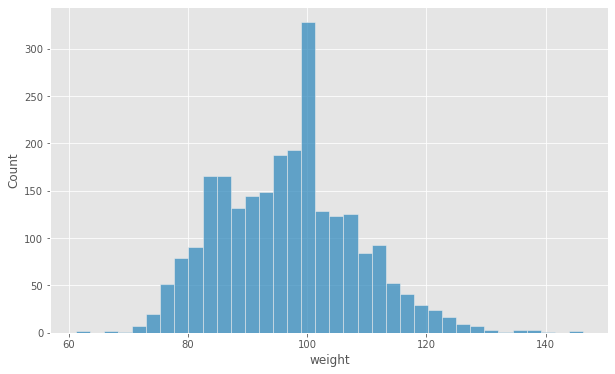

In [346]:
plt.style.use('ggplot')
plt.figure(figsize = (10,6))
sns.histplot(df['weight'])

In [302]:
df[['weight', 'draft_pick', 'draft_round']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2467 entries, 0 to 4683
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   weight       2467 non-null   int64  
 1   draft_pick   2467 non-null   float64
 2   draft_round  2467 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 77.1 KB


In [303]:
df.drop(["draft_team", "highSchool"], axis = 1, inplace = True)

In [304]:
df.shape

(2467, 18)

In [305]:
df['height'] = df['height'].str.replace("-", ".")

In [306]:
df['height'] = pd.to_numeric(df['height'])

In [307]:
df.shape

(2467, 18)

In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2467 entries, 0 to 4683
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   birthDate    2467 non-null   object 
 1   career_AST   2467 non-null   float64
 2   career_FG%   2467 non-null   object 
 3   career_FG3%  2162 non-null   object 
 4   career_FT%   2467 non-null   object 
 5   career_G     2467 non-null   int64  
 6   career_PER   2467 non-null   object 
 7   career_PTS   2467 non-null   float64
 8   career_TRB   2467 non-null   object 
 9   career_WS    2467 non-null   object 
 10  career_eFG%  2162 non-null   object 
 11  draft_pick   2467 non-null   float64
 12  draft_round  2467 non-null   float64
 13  draft_year   2467 non-null   object 
 14  height       2467 non-null   float64
 15  name         2467 non-null   object 
 16  position     2467 non-null   object 
 17  weight       2467 non-null   int64  
dtypes: float64(5), int64(2), object(11)
memory usage

In [309]:
#columns_for_numeric = ["career_FG%,", "career_FG3%", "career_FT% ", "career_PER", "career_TRB", "career_WS", "career_eFG%", "draft_year"]
df['career_FG3%'] = df["career_FG3%"].replace(["-", "NaN"], np.nan)

In [310]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(missing_values = np.nan, n_neighbors= 7)
print("Imputing işleminden önce eksik veri sayısı: ", df['career_FG3%'].isnull().sum())
df['career_FG3%'] = imputer.fit_transform(df['career_FG3%'].values.reshape(-1,1))
print("Imputing işleminden sonra eksik veri sayısı:", df['career_FG3%'].isnull().sum())


Imputing işleminden önce eksik veri sayısı:  502
Imputing işleminden sonra eksik veri sayısı: 0


In [311]:
df.head()

,birthDate,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,career_TRB,career_WS,career_eFG%,draft_pick,draft_round,draft_year,height,name,position,weight
0,"June 24, 1968",0.3,50.2,0.000000,70.1,256,13.0,5.7,3.3,4.8,50.2,25.0,1.0,1990,6.1,Alaa Abdelnaby,Power Forward,240
1,"April 7, 1946",1.2,42.8,24.422697,72.8,505,15.1,9.0,8.0,17.5,NaN,5.0,1.0,1968,6.9,Zaid Abdul-Aziz,Power Forward and Center,235
2,"April 16, 1947",3.6,55.9,5.600000,72.1,1560,24.6,24.6,11.2,273.4,55.9,1.0,1.0,1969,7.2,Kareem Abdul-Jabbar,Center,225
3,"March 9, 1969",3.5,44.2,35.400000,90.5,586,15.4,14.6,1.9,25.2,47.2,3.0,1.0,1990,6.1,Mahmoud Abdul-Rauf,Point Guard,162
4,"November 3, 1974",1.1,41.7,23.700000,70.3,236,11.4,7.8,3.3,3.5,42.2,11.0,1.0,1997,6.6,Tariq Abdul-Wahad,Shooting Guard,223


In [312]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2467 entries, 0 to 4683
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   birthDate    2467 non-null   object 
 1   career_AST   2467 non-null   float64
 2   career_FG%   2467 non-null   object 
 3   career_FG3%  2467 non-null   float64
 4   career_FT%   2467 non-null   object 
 5   career_G     2467 non-null   int64  
 6   career_PER   2467 non-null   object 
 7   career_PTS   2467 non-null   float64
 8   career_TRB   2467 non-null   object 
 9   career_WS    2467 non-null   object 
 10  career_eFG%  2162 non-null   object 
 11  draft_pick   2467 non-null   float64
 12  draft_round  2467 non-null   float64
 13  draft_year   2467 non-null   object 
 14  height       2467 non-null   float64
 15  name         2467 non-null   object 
 16  position     2467 non-null   object 
 17  weight       2467 non-null   int64  
dtypes: float64(6), int64(2), object(10)
memory usage

In [313]:
df['career_FG%'] = df['career_FG%'].replace('-', np.nan)

In [314]:
df['career_FG%'] = imputer.fit_transform(df['career_FG%'].values.reshape(-1,1))

In [315]:
print(df['career_FG%'].isnull().any())
df['career_FG%'] = pd.to_numeric(df['career_FG%'])

False


In [316]:
def numeric_maker(data):
  df[data] = df[data].replace("-", np.nan)
  if df[data].isnull().any() == True:
    df[data] = imputer.fit_transform(df[data].values.reshape(-1,1))
    df[data] = pd.to_numeric(df[data])
  if df[data].dtype == object:
    df[data] = pd.to_numeric(df[data])
  else:
    df[data] = imputer.fit_transform(df[data].values.reshape(-1,1))
  print(f"{data} değişkenindeki toplam eksik veri: ", df[data].isnull().sum())
  print(f"{data} değişkeninin veri tipi: ", df[data].dtype)

In [317]:
object_features = df.select_dtypes("object").drop(["position", "birthDate"], axis = 1)
object_features.columns

Index(['career_FT%', 'career_PER', 'career_TRB', 'career_WS', 'career_eFG%',
       'draft_year', 'name'],
      dtype='object')

In [318]:
for column in object_features.columns[0:5]:
  print(numeric_maker(column))

career_FT% değişkenindeki toplam eksik veri:  0
career_FT% değişkeninin veri tipi:  float64
None
career_PER değişkenindeki toplam eksik veri:  0
career_PER değişkeninin veri tipi:  float64
None
career_TRB değişkenindeki toplam eksik veri:  0
career_TRB değişkeninin veri tipi:  float64
None
career_WS değişkenindeki toplam eksik veri:  0
career_WS değişkeninin veri tipi:  float64
None
career_eFG% değişkenindeki toplam eksik veri:  0
career_eFG% değişkeninin veri tipi:  float64
None


In [319]:
print("DÜZENLEME SONRASI EKSİK VERİ KONTROLÜ\n", df.isnull().any())
print("--------------------------------------")
print("DÜZENLEME SONRASI VERİ TİPİ KONTROLÜ\n",df.dtypes)

DÜZENLEME SONRASI EKSİK VERİ KONTROLÜ
 birthDate      False
career_AST     False
career_FG%     False
career_FG3%    False
career_FT%     False
career_G       False
career_PER     False
career_PTS     False
career_TRB     False
career_WS      False
career_eFG%    False
draft_pick     False
draft_round    False
draft_year     False
height         False
name           False
position       False
weight         False
dtype: bool
--------------------------------------
DÜZENLEME SONRASI VERİ TİPİ KONTROLÜ
 birthDate       object
career_AST     float64
career_FG%     float64
career_FG3%    float64
career_FT%     float64
career_G         int64
career_PER     float64
career_PTS     float64
career_TRB     float64
career_WS      float64
career_eFG%    float64
draft_pick     float64
draft_round    float64
draft_year      object
height         float64
name            object
position        object
weight           int64
dtype: object


In [320]:
df['weight'] = df['weight'].apply(lambda x : x * 0.45)

In [321]:
df.head()

,birthDate,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,career_TRB,career_WS,career_eFG%,draft_pick,draft_round,draft_year,height,name,position,weight
0,"June 24, 1968",0.3,50.2,0.000000,70.1,256,13.0,5.7,3.3,4.8,50.200000,25.0,1.0,1990,6.1,Alaa Abdelnaby,Power Forward,108.00
1,"April 7, 1946",1.2,42.8,24.422697,72.8,505,15.1,9.0,8.0,17.5,46.658971,5.0,1.0,1968,6.9,Zaid Abdul-Aziz,Power Forward and Center,105.75
2,"April 16, 1947",3.6,55.9,5.600000,72.1,1560,24.6,24.6,11.2,273.4,55.900000,1.0,1.0,1969,7.2,Kareem Abdul-Jabbar,Center,101.25
3,"March 9, 1969",3.5,44.2,35.400000,90.5,586,15.4,14.6,1.9,25.2,47.200000,3.0,1.0,1990,6.1,Mahmoud Abdul-Rauf,Point Guard,72.90
4,"November 3, 1974",1.1,41.7,23.700000,70.3,236,11.4,7.8,3.3,3.5,42.200000,11.0,1.0,1997,6.6,Tariq Abdul-Wahad,Shooting Guard,100.35


# KEŞİFCİ VERİ ANALİZİ(EXPLORATORY DATA ANALYSIS - EDA)

Veri temizleme işlemlerimiz bitti. Şimdi sıra verimizi analiz etmeye geldi. Hikayemiz şöyle:

Bir nba takımında veri analistiyiz ve takımımız kendilerine takımı yönetebilecek, takıma yön verebilecek ve aynı zamanda superstar potansiyelinde bir oyuncu transfer etmek istiyor. Biz de bir veri analisti olarak bunu araştıracağız. Birtakım görselleştirme işlemleri ile başlayalım:

<AxesSubplot:>

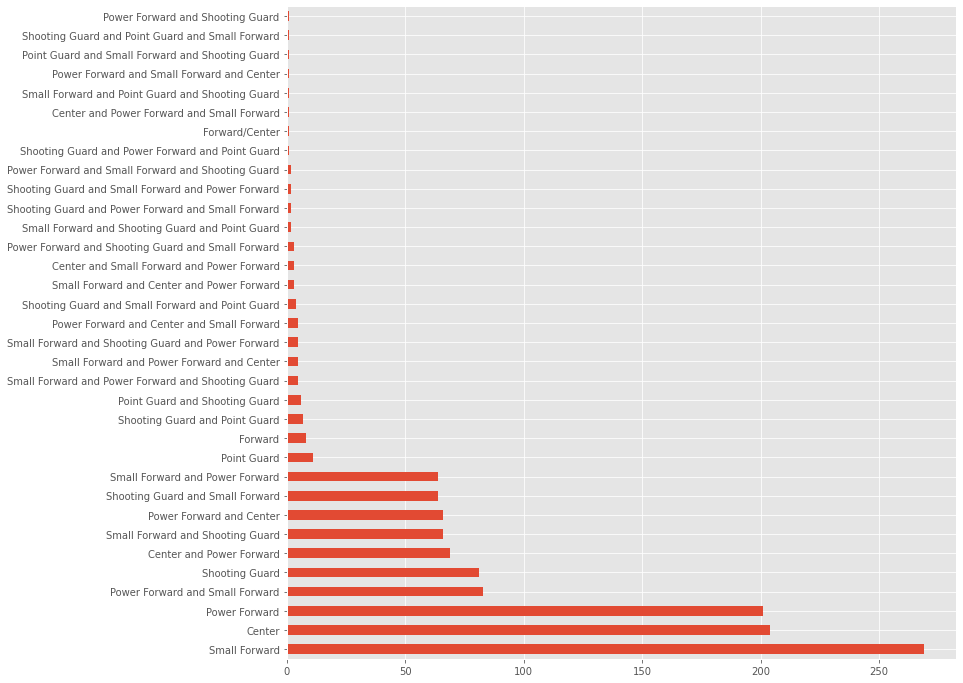

In [322]:
df[ df['height'] > df['height'].mean()]['position'].value_counts().plot(kind = "barh", figsize = (12,12))

Bu tablodan, Small Forward, Center, Power Forward pozisyonundaki oyuncuların daha uzun boylu olduğunu anlayabiliriz. Basketboldan anlamasak bile...

<AxesSubplot:>

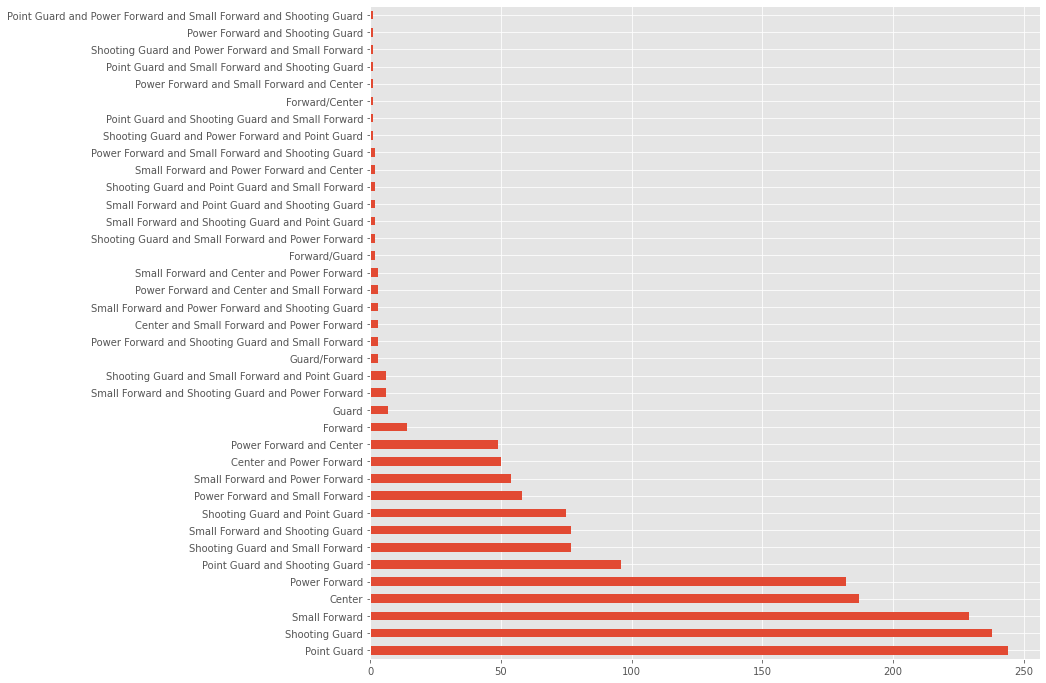

In [323]:
df[df['career_FG3%'] > df['career_FG3%'].mean()]['position'].value_counts().plot(kind = "barh", figsize = (12,12))

<AxesSubplot:>

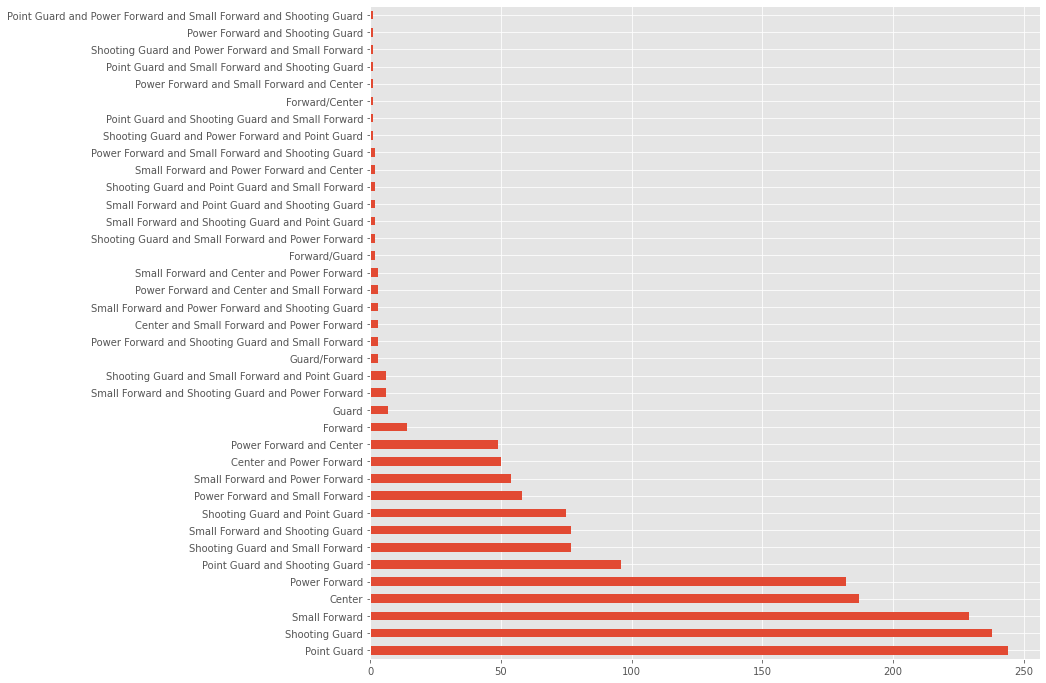

In [324]:
df[df['career_FG3%'] > df['career_FG3%'].mean()]['position'].value_counts().plot(kind = "barh", figsize = (12,12))

Bu tabloda ise en aşşağıda point guard'ı görmekteyiz. Point guardlar ve shooting guardların şut skorlarının genel olarak uzun oyunculardan daha fazla olduğunu görmekteyiz. Hmmm, peki acaba boy kısalığı ile şut atma arasında bir ilişki olabilir mi? İnceleyelim.

In [325]:
print("Boy ile şut atma arasındaki korelasyon: ", df[['career_FG3%', 'height']].corr().iloc[1:, 0][0])

Boy ile şut atma arasındaki korelasyon:  -0.10008600835314257


Boy uzunluğu ile şut atma arasındaki korelasyon -0.1 çıktı. Büyük bir ilişki olduğunu söylenemez. Yani şut atmada boyun etkisini göz ardı edebiliriz gibi. Hazır ilişki ve korelasyon derken veri setinin korelasyon matrisini de inceleyelim.

<AxesSubplot:>

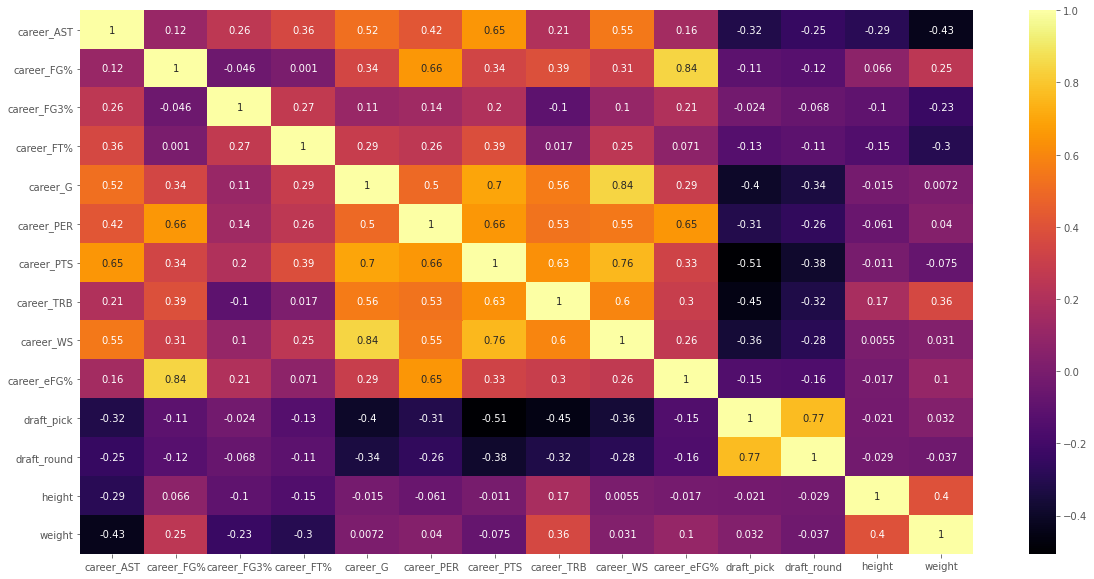

In [326]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot = True, cmap = "inferno")

Özniteliklerimize baktığımızda bizim için birkaç önemli öznitelik olduğunu söylemek mümkün. Bunlardan ilki ve en önemlisi belki de "career_WS" özniteliğidir. Bu öznitelik, "win share" in kısaltmasıdır ve oyuncuların galibiyetlere kişisel olarak ne kadar katkı yaptığı ile alakalıdır. Bir oyuncunun galibiyete yaptığı katkı bireysel olarak ne kadar fazla ise oyuncunun bir süperstar olma ihtimali de artacaktır. Bu nedenle ilk olarak bu özniteliği araştıralım.

In [347]:
import statistics as stats
print("Bir oyuncunun sahip olabileceği maksimum PER puanı: ",max(df['career_PER'].unique()))
print("Bir oyuncunun sahip olabileceği minimum PER puanı: ",min(df['career_PER'].unique()))
print("PER puanlarının medyanı : ",np.median(df['career_PER'].unique()))
print("PER puanlarının modu : ",stats.mode(df['career_PER']))
print("PER puanlarının ortalaması : ",np.mean(df['career_PER']))

Bir oyuncunun sahip olabileceği maksimum PER puanı:  76.1
Bir oyuncunun sahip olabileceği minimum PER puanı:  -48.6
PER puanlarının medyanı :  11.5
PER puanlarının modu :  12.6
PER puanlarının ortalaması :  12.387153344208816


In [ ]:
print("Bir oyuncunun sahip olabileceği maksimum WS puanı: ",max(df['career_WS'].unique()))
print("Bir oyuncunun sahip olabileceği minimum WS puanı: ",min(df['career_WS'].unique()))
print("WS puanlarının medyanı : ",np.median(df['career_WS'].unique()))
print("WS puanlarının modu : ",stats.mode(df['career_WS']))
print("WS puanlarının ortalaması : ",np.mean(df['career_WS']))

<AxesSubplot:xlabel='career_WS', ylabel='Count'>

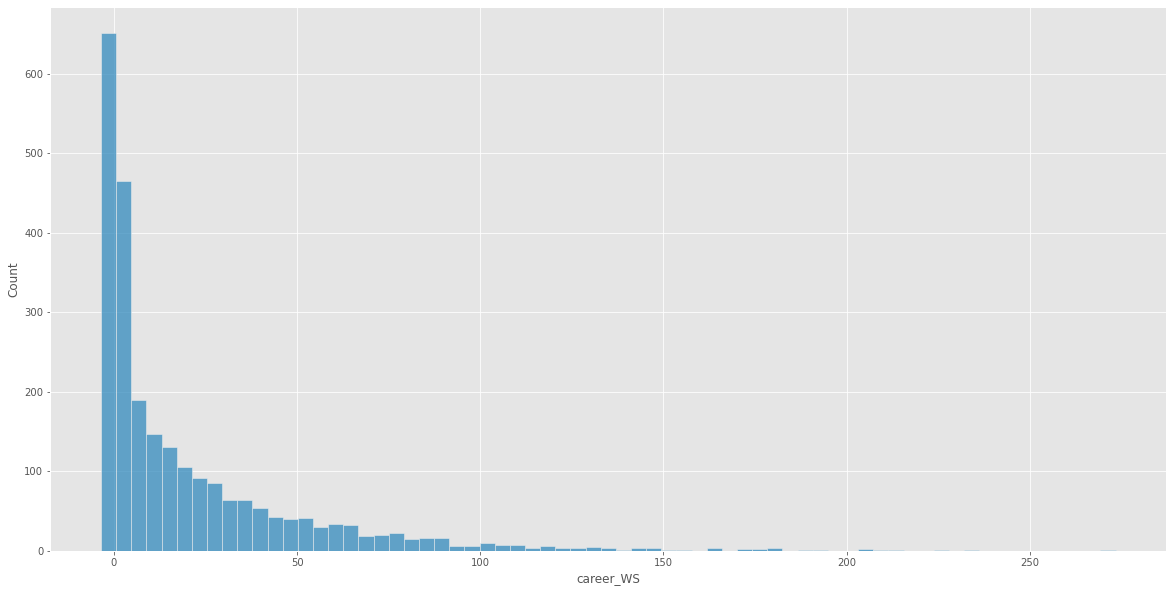

In [328]:
plt.figure(figsize=(20,10))
sns.histplot(df['career_WS'])

In [329]:
print("İyi derecede ws puanına sahip oyuncuların sayısı:",df[ df['career_WS'] > 37].shape[0])
high_ws = df[ df['career_WS'] > 37]

İyi derecede ws puanına sahip oyuncuların sayısı: 488


<AxesSubplot:title={'center':"Çıkarım: Rastgele seçilen bir oyuncunun ws puanının '50' civarı olması olasılığı diğer puanlara oranla yüksektir."}, xlabel='career_WS', ylabel='Density'>

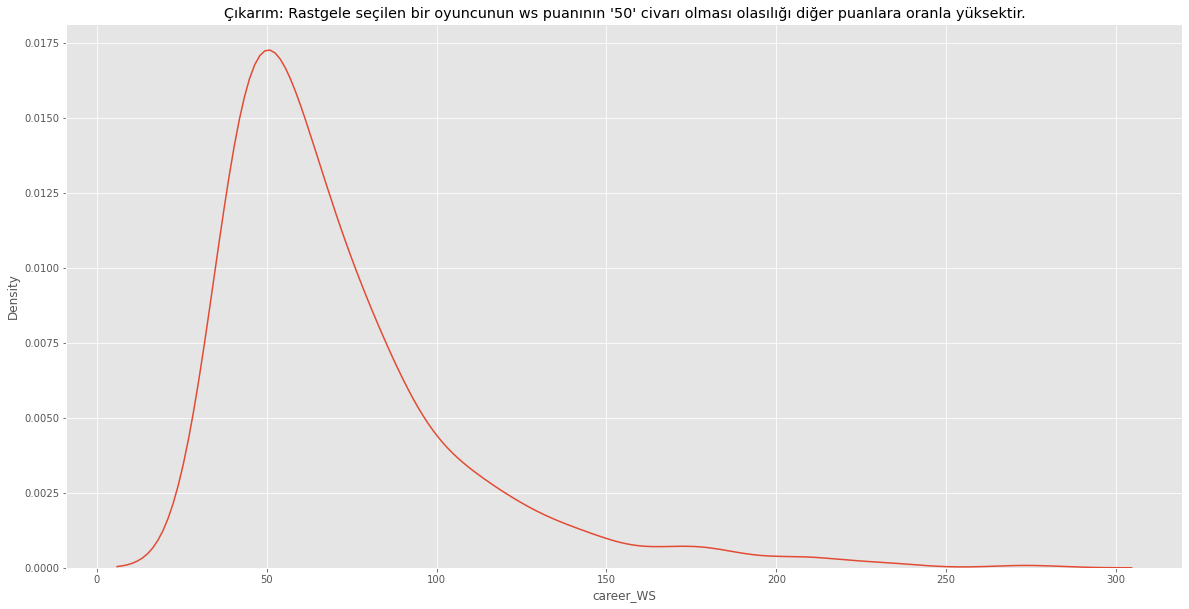

In [330]:
plt.figure(figsize=(20,10))
plt.title("Çıkarım: Rastgele seçilen bir oyuncunun ws puanının '50' civarı olması olasılığı diğer puanlara oranla yüksektir.")
sns.kdeplot(high_ws['career_WS'])

<AxesSubplot:title={'center':'Çıkarım: WS puanı yüksek olan oyuncular genelde uzun boylu oyunculardır'}>

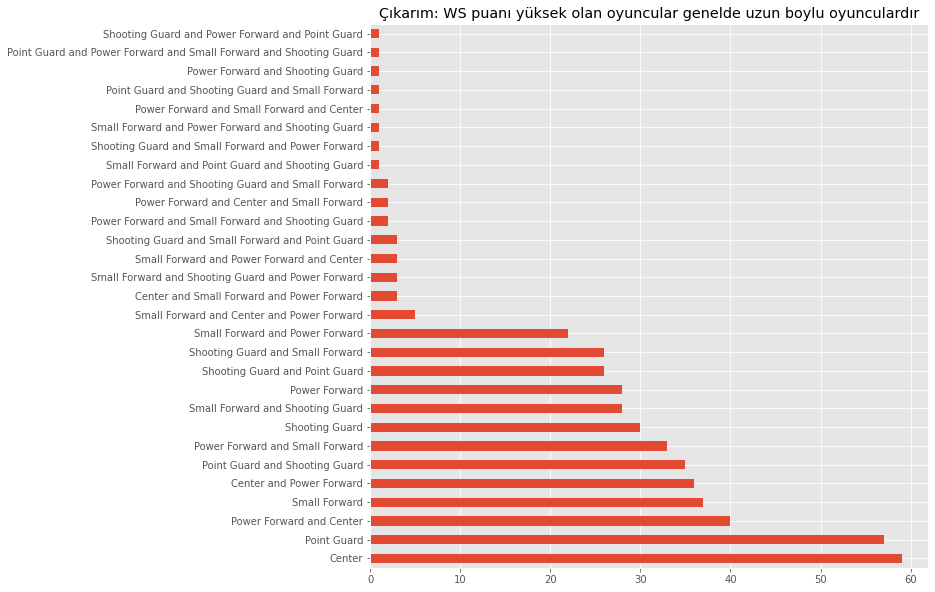

In [331]:
high_ws['position'].value_counts().plot(kind = "barh", figsize = (10,10),title = "Çıkarım: WS puanı yüksek olan oyuncular genelde uzun boylu oyunculardır")

<AxesSubplot:title={'center':'Çıkarım: ws puanı yüksek olan oyuncular genelde draftlerde en önce seçilenlerdir'}>

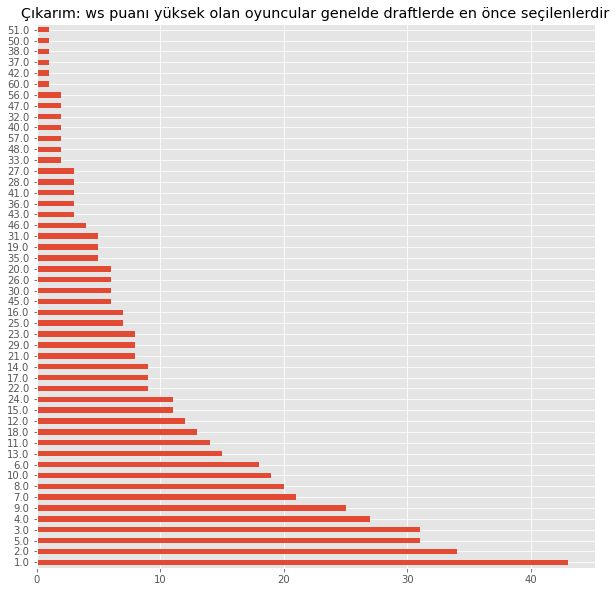

In [332]:
high_ws['draft_pick'].value_counts().plot(kind = "barh", figsize = (10,10), 
                                          title = "Çıkarım: ws puanı yüksek olan oyuncular genelde draftlerde en önce seçilenlerdir")

<AxesSubplot:title={'center':'Draftlarda en önce seçilen oyuncular genelde uzun boylu potaaltı oyuncularıdır.'}>

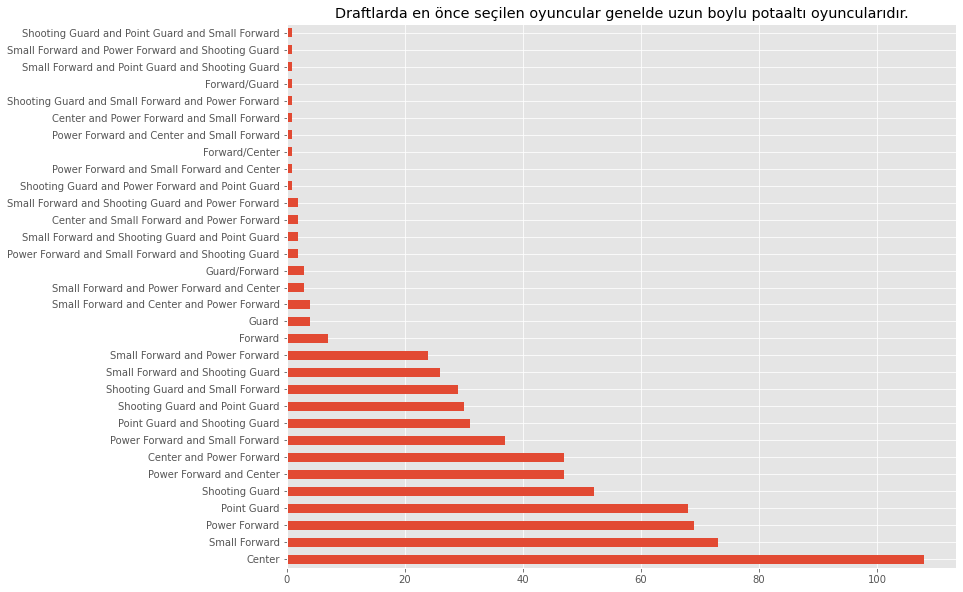

In [333]:
df[ df['draft_pick'] <= 10]["position"].value_counts().plot(kind = "barh", figsize = (12,10), title = "Draftlarda en önce seçilen oyuncular genelde uzun boylu potaaltı oyuncularıdır.")

In [334]:
df[['career_WS', 'career_TRB']].corr()

,career_WS,career_TRB
career_WS,1.000000,0.599608
career_TRB,0.599608,1.000000


In [335]:
high_ws = high_ws[ high_ws['draft_pick'] <= 10]
high_ws.shape

(269, 18)

Şuana kadarki çıkarımlarımızı not edelim: 

- Rastgele seçilen bir oyuncunun ws puanının '50' civarı olması olasılığı diğer puanlara oranla yüksektir.
- WS puanı yüksek olan oyuncular genelde uzun boylu oyunculardır
- Ws puanı yüksek olan oyuncular genelde draftlerde en önce seçilenlerdir
- Draftlarda en önce seçilen oyuncular genelde uzun boylu potaaltı oyuncularıdır

* O halde biz de uzun boylu oyunculara yönelmeliyiz. Hem bireysel performansları daha iyi, hem de ligteki rakiplerimizin takım boy ortalamalarından çok kısa kalmamalıyız.

In [336]:
main_players = high_ws[ (high_ws['height'] > df['height'].mean())]
main_players = main_players[  (main_players['position'] =="Center") | (main_players['position'] =="Power Forward") |
                                (main_players['position'] =="Small Forward")]

In [337]:
main_players.head()

,birthDate,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,career_TRB,career_WS,career_eFG%,draft_pick,draft_round,draft_year,height,name,position,weight
2,"April 16, 1947",3.6,55.9,5.600000,72.1,1560,24.6,24.6,11.2,273.4,55.900000,1.0,1.0,1969,7.2,Kareem Abdul-Jabbar,Center,101.25
30,"December 10, 1959",3.1,48.4,31.200000,74.1,923,19.0,20.0,5.0,67.8,49.800000,1.0,1.0,1981,6.6,Mark Aguirre,Small Forward,104.40
191,"January 29, 1955",2.2,47.2,33.800000,78.7,802,15.7,12.4,6.1,54.0,47.700000,4.0,1.0,1977,6.7,Greg Ballard,Small Forward,96.75
231,"March 28, 1944",4.9,45.6,29.700000,89.3,1020,21.0,24.8,6.7,128.9,46.000000,2.0,1.0,1965,6.7,Rick Barry,Small Forward,92.25
373,"August 23, 1945",3.2,45.3,24.422697,67.5,635,16.3,7.2,9.0,38.0,46.658971,4.0,1.0,1968,7.0,Tom Boerwinkle,Center,119.25


Yaptığımız çıkarımlardan yola çıkarak boyu ortalamadan uzun olmayan oyuncuları ve oynadığı pozisyon uzun boyla oynamaya müsait olmayan oyuncuları listeden çıkarttık. Dikkat ettiyseniz şuana dek yaptığımız bütün çıkarımlar ws puanı üzerineydi. Şimdi ise diğer birtakım özniteliklerden yola çıkarak yorum yapmaya çalışalım. Bu öznitelikleri ise ws ile en büyük korelasyona sahip özniteliklerden seçeceğim. Bu öznitelikleri sıralamak gerekirse: 

- career_AST
- career_G
- career_PER	
- career_TRB 
- career_PTS

In [338]:
main_players[['career_AST']].describe().T

,count,mean,std,min,25%,50%,75%,max
career_AST,46.0,2.382609,1.038012,0.7,1.6,2.3,3.0,5.2


In [339]:
main_players[['career_G']].describe().T

,count,mean,std,min,25%,50%,75%,max
career_G,46.0,881.804348,266.359541,323.0,723.25,859.0,986.25,1611.0


In [340]:
main_players = main_players[ (main_players['career_PTS'] >= np.mean(main_players['career_PTS'])) & 
                           (main_players['career_G'] > np.median(main_players['career_G']))]
main_players.shape

(11, 18)

In [341]:
main_players

,birthDate,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,career_TRB,career_WS,career_eFG%,draft_pick,draft_round,draft_year,height,name,position,weight
2,"April 16, 1947",3.6,55.9,5.6,72.1,1560,24.6,24.6,11.2,273.4,55.9,1.0,1.0,1969,7.2,Kareem Abdul-Jabbar,Center,101.25
30,"December 10, 1959",3.1,48.4,31.2,74.1,923,19.0,20.0,5.0,67.8,49.8,1.0,1.0,1981,6.6,Mark Aguirre,Small Forward,104.40
231,"March 28, 1944",4.9,45.6,29.7,89.3,1020,21.0,24.8,6.7,128.9,46.0,2.0,1.0,1965,6.7,Rick Barry,Small Forward,92.25
2271,"December 4, 1956",3.3,51.8,17.2,73.0,874,19.2,22.5,5.8,75.4,51.9,7.0,1.0,1977,6.7,Bernard King,Small Forward,92.25
3108,"March 6, 1972",2.5,58.2,4.5,52.7,1207,26.4,23.7,10.9,181.7,58.2,1.0,1.0,1992,7.1,Shaquille O'Neal,Center,146.25
3132,"January 21, 1963",2.5,51.2,20.2,71.2,1238,23.6,21.8,11.1,162.8,51.3,1.0,1.0,1984,7.0,Hakeem Olajuwon,Center,114.75
3309,"September 25, 1965",5.2,47.3,32.6,70.4,1178,18.6,16.1,6.4,125.1,50.4,5.0,1.0,1987,6.8,Scottie Pippen,Small Forward,94.50
3470,"May 28, 1967",2.1,45.6,40.0,84.6,1000,16.2,18.3,4.4,88.7,50.8,4.0,1.0,1989,6.7,Glen Rice,Small Forward,96.75
3528,"August 6, 1965",2.5,51.8,25.0,73.6,987,26.2,21.1,10.6,178.7,51.9,1.0,1.0,1987,7.1,David Robinson,Center,105.75
4302,"August 12, 1976",3.5,41.4,32.5,63.3,893,16.0,17.5,7.7,38.1,46.1,6.0,1.0,1996,6.8,Antoine Walker,Power Forward,100.80


## SON

WS Puanı ile korelasyonu yüksek olan birkaç özniteliği daha işin içine katarak birkaç oyuncu daha eledik. Son eleme aşamsında ise "career_PTS" ve "career_G" özniteliklerini kullandık. Diğer öznitelikleri eleme için kullanmamamızın sebebi, bazılarının korelasyonunun düşük olması ve diğerlerinin ise oyuncu seçiminde çok büyük bir öneme sahip olmaması. Örneğin oyuncunun ortalama asistini belirten "career_AST" özniteliğinde en yüksek değer 5 iken en düşük değer 1'di. Aradaki 4 asistlik bir fark, herhangi bir oyuncuyu başka bir oyuncudan daha iyi yapmayacaktır. Aynı şeyler diğer birtakım öznitelikler için de geçerlidir.

Ortaya çıkarttığımız ve sona kalan 11 oyuncu, gerek istatistikleri gerekse diğer oyunculardan daha iyi özelliklere sahip olmaları sebebi ile bir takıma liderlik etme ve takımı taşıyabilme potansiyeli en yüksek oyuncular olarak değerlendirilmişlerdir. 